Control de arboles de clasificacion: <br>
Sebastian Rosales Tejeda <br>
21473604-5 <br>
sebastian.rosales.14@sansano.usm.cl <br>

El escrito está desarrollado en Google Colab.



Importamos librerías a utilizar

In [1]:
install.packages("tree")
install.packages("ggplot2")
library(tree)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#load dataframe
data <- read.table("/content/DatosControl.csv", header = TRUE, sep = ',')

In [3]:
#columns names = [Nembarazada,Glucosa,Presion,Triceps,Insulina,IMC,Pedigree,Edad,Diabetes]
#cuanta data tenemos
dim(data)

[1] 768   9

In [4]:
#cantidad de Embarazadas con Diabetes
xtabs(~Diabetes, data = data)

Diabetes
  0   1 
500 268 

Data exploration:

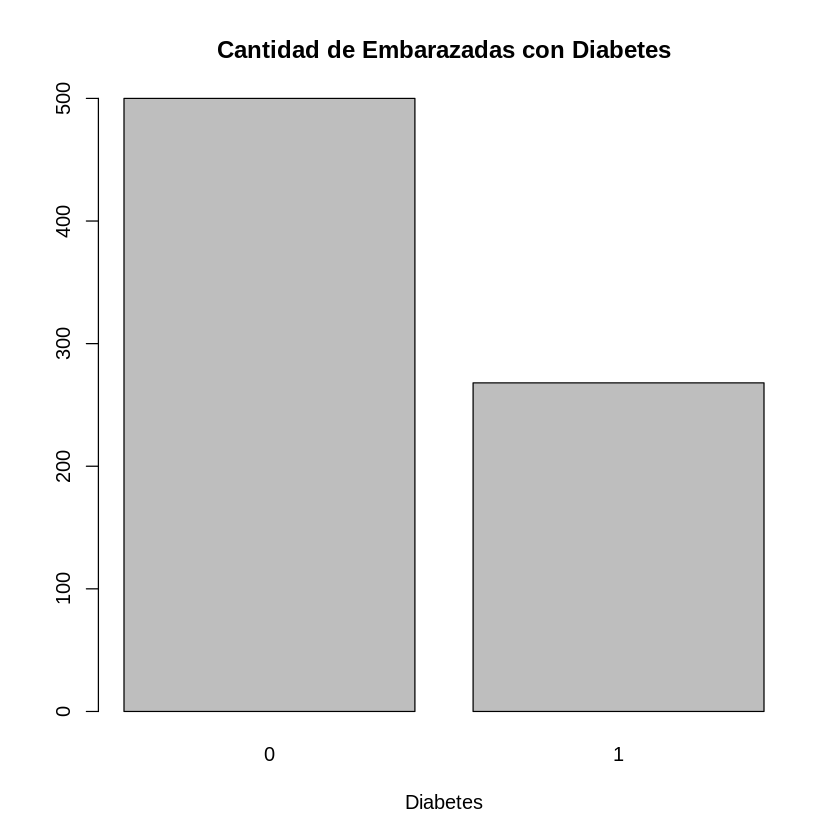

In [5]:
diabetes_count <- table(data$Diabetes)
#grafico barra
barplot(diabetes_count, main = "Cantidad de Embarazadas con Diabetes", xlab = 'Diabetes')

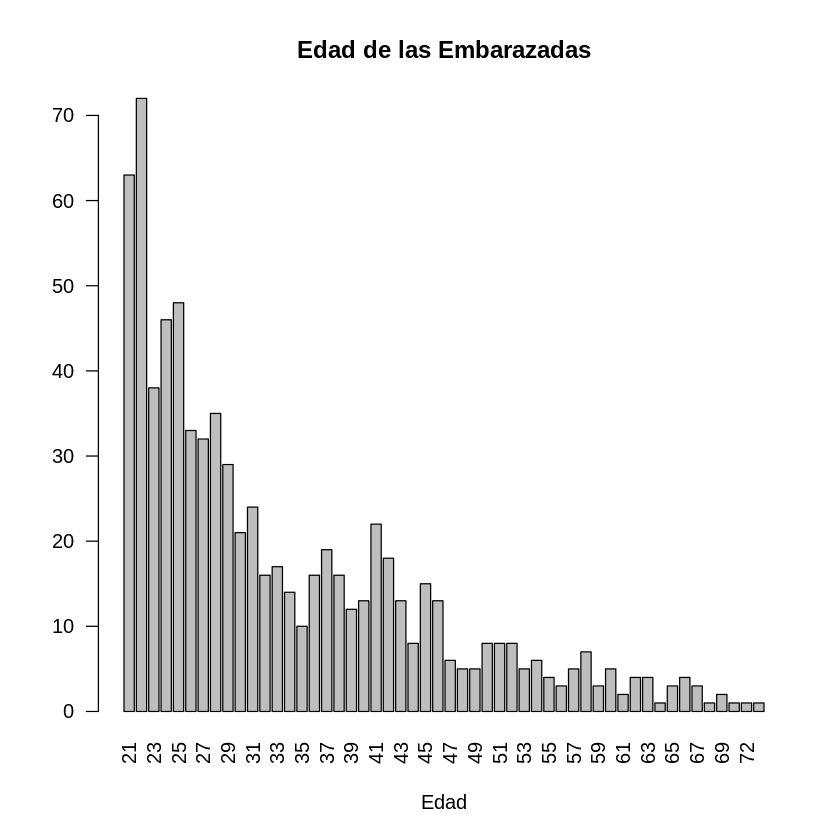

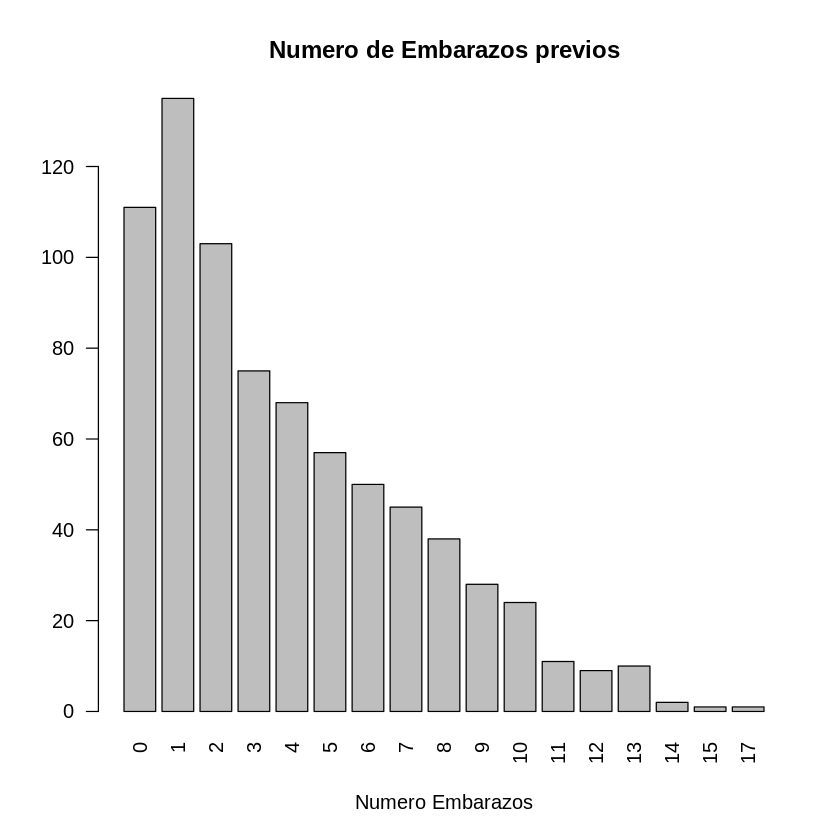

In [6]:
type1_count <- table(data$Edad)
barplot(type1_count, main='Edad de las Embarazadas',xlab='Edad',las=2)

type2_count <- table(data$Nembarazada)
barplot(type2_count, main='Numero de Embarazos previos',xlab='Numero Embarazos',las=2)


Es posible apreciar que la única variable categórica es Diabetes (Nuestra variable objetivo), por cosa de espacio omitiré los gráficos restantes. 

Cabe destacar como observación importante que, la cardinalidad de la clase de predicción no es la misma, lo cual puede traer errores de predicción importantes al clasificar a futuro, en conjunto con la poca cantidad de ejemplos de entrenamiento de nuestros modelos. 

# Pregunta 1:

Realizamos factor para posteriormente hacer el train-test split (70-30)



In [35]:
#La unica variable categorica es Diabetes
data$Diabetes <- factor(data$Diabetes)

In [36]:
#train-test split
#Seteamos una semilla para replicar resultados
set.seed(42)

#En este caso utilizaremos un conjunto de entrenamiento con el 70% de los datos
train_size <- floor(0.70 * nrow(data)) #El tamaño será el 70% de la cantidad de filas
train_mask <- sample(seq_len(nrow(data)),size= train_size) #Mascara aleatoria

#Separamos los conjuntos
train <- data[train_mask, ]
test <- data[-train_mask, ]

In [37]:
#chequeamos la dimensionalidad
dim(train)
dim(test)

[1] 537   9

[1] 231   9

In [38]:
#ARMAR ARBOL
arbol = tree(Diabetes ~ Nembarazada + Glucosa + Presion + Triceps + Insulina + IMC + Pedigree +
             Edad, data = train)

In [39]:
summary(arbol)


Classification tree:
tree(formula = Diabetes ~ Nembarazada + Glucosa + Presion + Triceps + 
    Insulina + IMC + Pedigree + Edad, data = train)
Variables actually used in tree construction:
[1] "Glucosa"     "Edad"        "IMC"         "Triceps"     "Nembarazada"
[6] "Presion"     "Pedigree"   
Number of terminal nodes:  19 
Residual mean deviance:  0.7274 = 376.8 / 518 
Misclassification error rate: 0.1695 = 91 / 537 

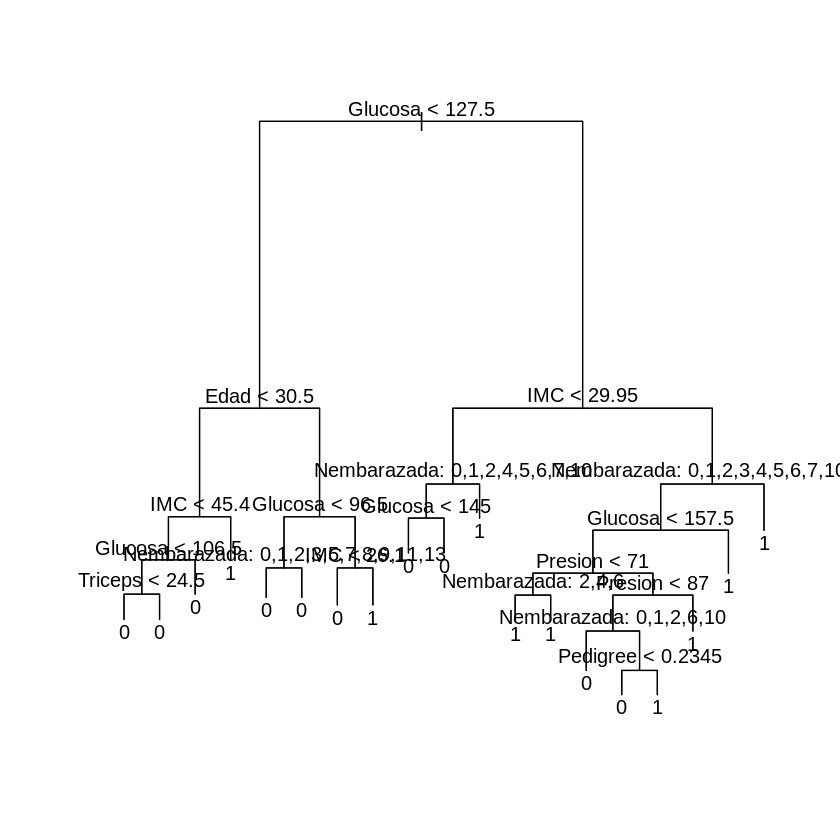

In [40]:
plot(arbol)
text(arbol, pretty=1)

**Parte 1:**

El árbol obtenido tiene 7 niveles (sin contar la raíz) y 19 hojas. Es importante mencionar que el subárbol izquierdo tiene 4 niveles, por lo que se llega a un resultado en un número menor de comparaciones respecto al subárbol derecho. 

El error de clasificación en el training set es de 0.1695, menor al 17%. Cabe mencionar que, debido a la cantidad de particiones en el subárbol derecho, es probable que exista overfitting, para determinar con exactitud habría que evaluar distintos arboles utilizando test y train sets. (Preferiblemente con la misma cardinalidad de clases a predecir.) 



**Parte 2:**

La variable que no genera particiones es **Insulina**, esta no participa debido a que, lo más probable, la bondad de la partición no es lo suficientemente alta para ser seleccionada por sobre las otras. Tenemos 4 niveles en el subárbol izquierdo y 7 niveles en el subárbol derecho. <br> 

En el subárbol izquierdo y derecho se alcanza la impureza mínima antes de poder particionar respecto a la **Insulina**, por lo tanto, se deja de particionar. 



# Pregunta 2:

In [41]:
#ARMAR ARBOL
arbol_2 = tree(Diabetes ~ Nembarazada + Presion + Triceps + Insulina + Pedigree +
             Edad, data = train)

In [42]:
summary(arbol_2)


Classification tree:
tree(formula = Diabetes ~ Nembarazada + Presion + Triceps + Insulina + 
    Pedigree + Edad, data = train)
Variables actually used in tree construction:
[1] "Edad"        "Triceps"     "Nembarazada" "Pedigree"    "Insulina"   
Number of terminal nodes:  11 
Residual mean deviance:  0.973 = 511.8 / 526 
Misclassification error rate: 0.2626 = 141 / 537 

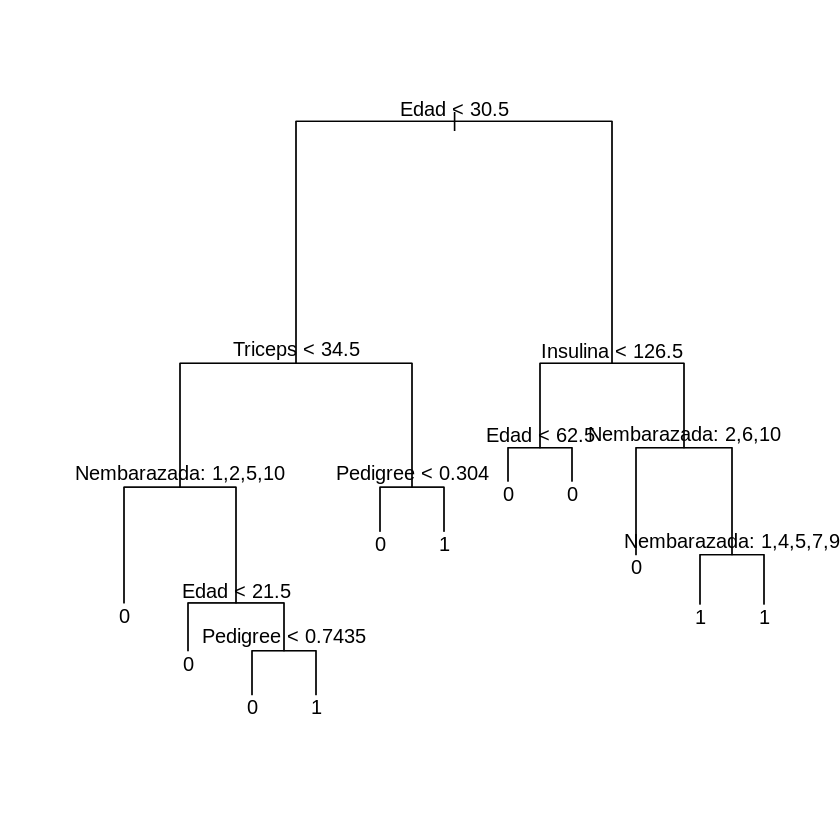

In [43]:
plot(arbol_2)
text(arbol_2, pretty=1)

**Parte 1:**

Comparando ambos arboles obtenidos: 

El árbol de la pregunta 2 tiene 4 niveles, de forma particular el subárbol izquierdo tiene 4, el subárbol derecho tiene 3 niveles y en total 11 hojas. En cambio, el árbol de la pregunta 1 tiene 7 niveles y 19 hojas. 

En la pregunta 1 tenemos una menor tasa de error que en la pregunta 2, esto puede deberse a no utilizar la variable Glucosa en la clasificación. (Es conocido que altas cantidades de Glucosa en la sangre está relacionada con Diabetes). 

Cabe mencionar que el árbol obtenido en la pregunta 2 al tener menos niveles (realizar menor particiones) debería ser capaz de generalizar de mejor forma, esto no ocurre en este caso debido a la cantidad de ejemplos de entramiento (son pocos), sumado a que la cardinalidad de la clase de predicción no es la misma. (500:No Diabete ,268: Diabete) 

Al no realizar la predicción sobre el árbol de la pregunta 1 no es posible concluir a cabalidad que árbol se comporta de mejor forma. (Precisión en el test set) 

Queda planteado como trabajo a futuro realizar una comparación a cabalidad, incluyendo técnicas de poda y otras que reduzcan el overfitting, para determinar un árbol de decisión apropiado. 


**Parte 2:**

Considerando el test set, la precisión del árbol es del *65%* aproximadamente (0.64935). 

In [46]:
# Predecimos Diabetes para los datos de pruebas
pred <- predict(arbol_2,test,type='class')

# Creamos la matriz de confusión
conf_matrix <- with(test,table(pred,test$Diabetes))

In [47]:
#matriz de confusion 
conf_matrix

    
pred   0   1
   0 135  60
   1  21  15

In [54]:
acc <- sum(diag(conf_matrix))/nrow(test)

In [53]:
acc

[1] 0.6493506

**Parte 3:**

El diagnostico asignado a (2,30,71,26,5.3, 27, 0.33, 40) se obtiene evaluando el árbol. 

La edad es mayor a 30.5, tomamos el subárbol derecho. <br> 

La insulina es menor a 126.5, tomamos el subárbol izquierdo.<br> 

La edad es menor a 62.5, llegamos a la hoja con valor 0.<br> 

El resultado es: *No Diabete* 
